In [1]:
import datetime
import pandas as pd
import numpy as np
import time as tm

time = datetime.date(2017,8,9)

print(time)
print(type(time))

time2 = tm.strptime("2017-08-08","%Y-%m-%d")
print(type(time2))
print(time2)
print(time2.tm_year)

print "{0} {1} 01".format('2018','02')

2017-08-09
<type 'datetime.date'>
<type 'time.struct_time'>
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=8, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=220, tm_isdst=-1)
2017
2018 02 01


In [5]:
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')

print(data.head(2))

print(data.columns[1])

   Store       Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1 2015-07-31   5263        555     1      1            0              1
1      2 2015-07-31   6064        625     1      1            0              1
Date


D:\DevTools\Anaconda3\envs\py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Index([u'Store', u'Date', u'Sales'], dtype='object')
            Store   Sales
Date                     
2013-01-31    2.0  115171
2013-02-28    2.0  111114


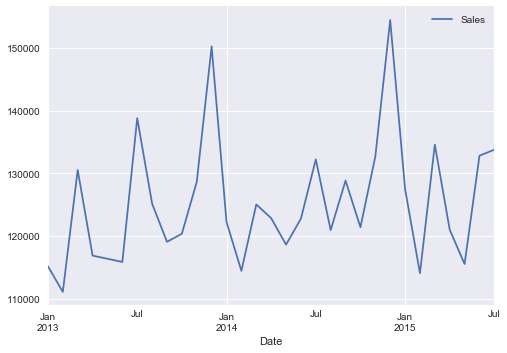

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data.sort_values("Date", ascending= True)

def select_data(store_id):
    data2 = data[data.Store == store_id]
    #print(data2)
    simple_data = data2.drop(['Customers','Open','Promo','SchoolHoliday','StateHoliday'], axis =1)
    print(simple_data.columns)
    date_col = simple_data['Date']
    simple_data.index = date_col
    simple_data = simple_data.resample('M').sum() 
    #reset store id
    store_number = np.empty(len(simple_data['Sales']))
    store_number.fill(store_id)
    simple_data['Store'] = store_number
    return simple_data


simple_data = select_data(2)
print(simple_data.head(2))
simple_data.plot(kind='line',x=simple_data.index,y='Sales')


Index([u'Store', u'Date', u'Sales'], dtype='object')
Index([u'Store', u'Date', u'Sales'], dtype='object')


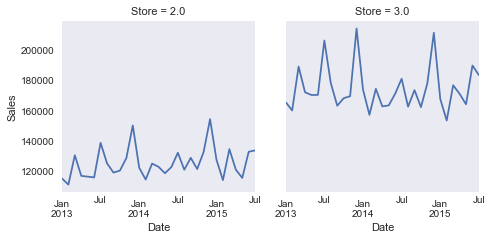

In [4]:
plot_datas = pd.DataFrame({'Sales':[],'Date':[]})
#plot_datas.index = plot_datas['Date']

simple_data_2 = select_data(2)
simple_data_2.reset_index(inplace = True)
#print(simple_data_2)

simple_data_3 = select_data(3)
simple_data_3.reset_index(inplace = True)
#print(simple_data_3)

plot_datas = plot_datas.append(simple_data_2)
plot_datas = plot_datas.append(simple_data_3)

#print(plot_datas)

plot_datas.sort_values("Date", ascending= True,inplace= True)
#print(plot_datas)


def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
g = sns.FacetGrid(plot_datas, col="Store", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "Date", "Sales")

def temp():
    simple_data_expend = simple_data.reset_index()
    store_number = np.empty(len(simple_data_expend['Date']))
    store_number.fill(np.int(3.9))
    print(type(store_number[1]))
    simple_data_expend['Store'] = store_number
    plot_datas = plot_datas.append(simple_data_expend)
    print(plot_datas)

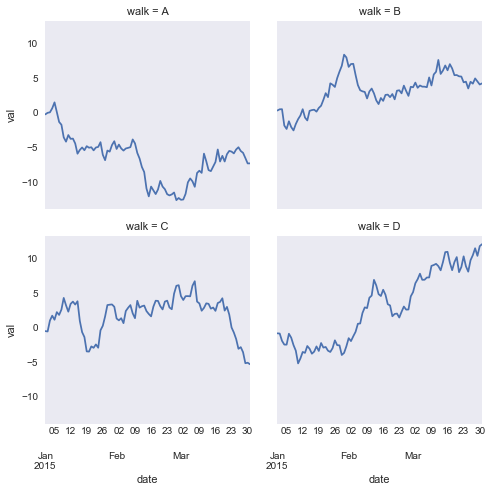

In [5]:
import pandas as pd
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(['A','B','C','D'], name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
      name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
#print(df)
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "date", "val")

## SARIMAX prediction

In [151]:
import numpy
daily_sales = pd.read_csv("./data/train.csv")
daily_sales = daily_sales[daily_sales.Store == 20]
data = pd.DataFrame({'Sales':[],'Date':[]})
data['Sales'] = daily_sales['Sales']
data['Date'] = daily_sales['Date']
# data['Store'] = daily_sales['Store']

data.sort_values("Date", ascending= True, inplace= True)
#data.reset_index(inplace = True)

print(data.head(2))

max_log_y = numpy.max(numpy.log(data['Sales']))

def val_for_fit(val):
    val = numpy.log(val) / max_log_y
    return val

#data['Sales'] = val_for_fit(data['Sales'])

data.set_index(['Date'], inplace=True, drop=True)
data.index.name=None

print(data.head(2))

               Date  Sales
1016114  2013-01-01      0
1014999  2013-01-02   7110
            Sales
2013-01-01      0
2013-01-02   7110


/Tools/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


In [152]:
data = data[0:100]
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data.fillna(0, inplace = True)
print(data.tail(3))

            Sales
2013-04-08   9965
2013-04-09   9415
2013-04-10   7515


                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                  100
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -941.609
Date:                Sun, 27 Aug 2017   AIC                           1891.217
Time:                        08:44:35   BIC                           1901.638
Sample:                    01-01-2013   HQIC                          1895.435
                         - 04-10-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6972.9013   4716.809      1.478      0.139   -2271.874    1.62e+04
ar.L1         -0.2033      0.840     -0.242      0.809      -1.849       1.442
ma.L1          0.3348      0.807      0.415      0.6

/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


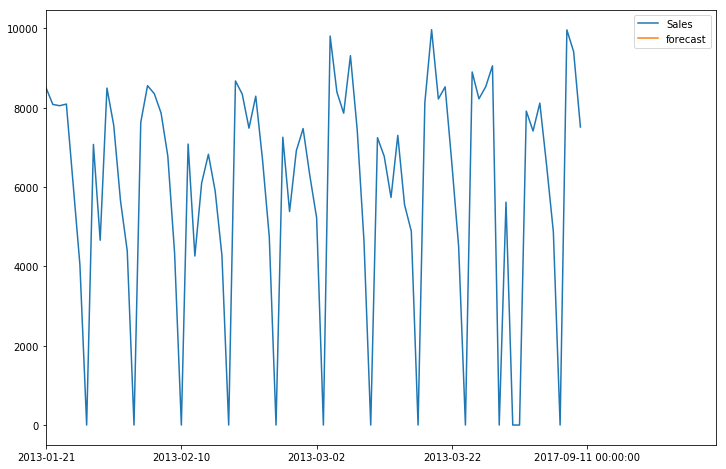

In [153]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm

#def test_final_output():
# data = pd.DataFrame({'Sales':[199,100,222],'Date':['2017-06-01','2017-07-29','2017-08-26']})
#data = pd.DataFrame({'Sales':[199,100,222]})
# data['Sales'] = daily_sales['Sales']
# data['Date'] = daily_sales['Date']
# data['Store'] = daily_sales['Store']
# data = data[data.Store == 6]
# data.sort_values("Date", ascending= True, inplace= True)
# data.reset_index(inplace = True)

df = data
nobs=len(df)
#pd.index = pd.to_datetime(df['Date'])

# df.set_index(['Date'], inplace=True)
# df.index.name=None

# df.index.name=None
# df.reset_index(inplace=True)
# start = datetime.datetime.strptime("2017-06-01", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,3)]
# print(date_list)
# df['index'] = date_list
# df.columns= ['riders']
# df['riders'] = df.riders.apply(lambda x: int(x)*100)

mod = sm.tsa.statespace.SARIMAX(df.Sales, trend='c', order=(1,0,1))
# mod = sm.tsa.statespace.SARIMAX(df.Sales, trend='n')
results = mod.fit(trend='c', disp=False,transparams=True)

print(results.summary())

start = datetime.datetime.strptime("2017-09-11", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,20)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future])
# print(df.head(3))

df['forecast'] = results.predict(start = 1, dynamic= True)
df[['Sales', 'forecast']].ix[-100:].plot(figsize=(12, 8))
print (df.forecast/100)

## ARIMA模型

/Tools/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
/Tools/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).std()


             Sales
2013-01-01     NaN
2013-01-02  3555.0


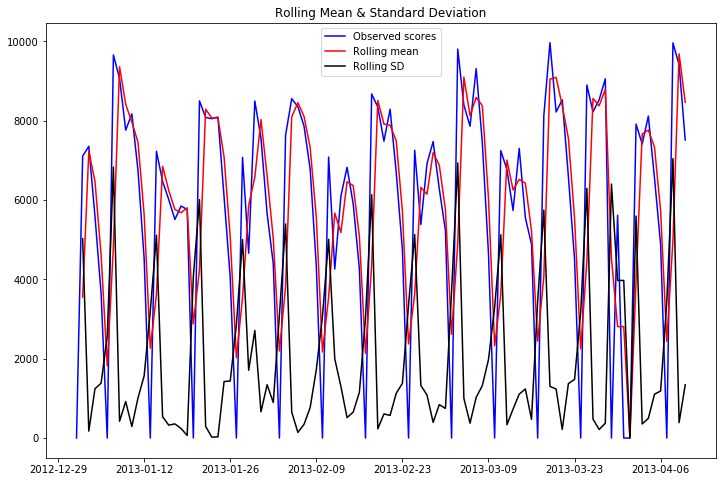

In [163]:
import os
import re
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import welch
import operator

daily_sales = pd.read_csv("./data/train.csv")
daily_sales = daily_sales[daily_sales.Store == 20]
data = pd.DataFrame({'Sales':[],'Date':[]})
data['Sales'] = daily_sales['Sales']
data['Date'] = daily_sales['Date']
# data['Store'] = daily_sales['Store']

data.sort_values("Date", ascending= True, inplace= True)
data = data[0:100]
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data.fillna(0, inplace = True)


# data = pd.DataFrame({'Sales':[199,100,222],'Date':['2017-06-01','2017-07-29','2017-08-26']})

data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'], inplace=True)
data.index.name=None

def plotmean(timeseries, show=0, path=''):
    rolmean = pd.rolling_mean(timeseries, window=2)
    
    print(rolmean.head(2))
    
    rolstd = pd.rolling_std(timeseries, window=2)
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Observed scores')
    mean = plt.plot(rolmean, color='red', label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling SD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    if show != 0:
        plt.show()
    if path != '':
        plt.savefig(path, format='png', bbox_inches='tight')
    plt.clf()
    
# print(type(data.iloc[0,0]))
plotmean(data, show=1)

In [159]:
def runwelch(dta, show, path = ''):
    nps = (len(dta) / 2) + 8
    nov = nps / 2
    fft = nps
    fs_temp = .0002778
    # Set to 1/3600 because of hourly sampling
    f, Pxx_den = welch(dta, fs=fs_temp, nperseg=nps, noverlap=nov, nfft=fft, scaling="spectrum")
    plt.plot(f, Pxx_den)
    plt.ylim([0.5e-7, 10])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    if show != 0:
        plt.show()
    if path != '':
        plt.savefig(path, format='png', bbox_inches='tight')
    plt.clf()
    return f, Pxx_den

runwelch(data, 1)

/Tools/anaconda/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 58 is greater than input length  = 1, using nperseg = 1
  .format(nperseg, input_length))


ValueError: noverlap must be less than nperseg.

## Grouping

In [6]:
# Sales Data
store_data = "./data/store.csv"
store = pd.read_csv(store_data)
store.fillna('0')

print store.head(2)

def find_store_info(store_id):
    store_info = store.loc[store['Store'] == store_id]
    return store_info.iloc[0,1],store_info.iloc[0,2]
    
print type(find_store_info(2))
a,b = find_store_info(1)
print a
print b

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
<type 'tuple'>
c
a


In [7]:
data['StoreType'] = np.empty(len(data['Sales']))
data['Assortment'] = np.empty(len(data['Sales']))
data['CD'] = np.empty(len(data['Sales']))

print data.head(2)

def set_cd(store_id):
    return 999

for index, row in data.iterrows():
    store_id = data.iloc[index,0]
    data.iloc[index,10] = set_cd(store_id)
    st,am = find_store_info(store_id)
    data.iloc[index,8] = st
    data.iloc[index,9] = am
    
print data.head(2)

   Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2015-07-31   5263        555     1      1            0   
1      2 2015-07-31   6064        625     1      1            0   

   SchoolHoliday  StoreType  Assortment   CD  
0              1        0.0         0.0  0.0  
1              1        0.0         0.0  0.0  
   Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2015-07-31   5263        555     1      1            0   
1      2 2015-07-31   6064        625     1      1            0   

   SchoolHoliday StoreType Assortment     CD  
0              1         c          a  999.0  
1              1         a          a  999.0  


In [1]:
import numpy as np
data = np.random.random(size=(6, 4))
print((data))

labels = np.random.randint(10, size=(6, 1))
print(labels)

print(data[0])
data_x = []
data_x.append(data[0])
data_x.append(data[2])
print((data_x))
#data_x = np.array(data_x)
print(np.array(data_x))

sample = np.random.randint(4, size=2)

sample_x = data[sample,:]

print(sample_x)

print("slice")
print(data[3:1:-1])

[[ 0.17256588  0.23736748  0.7171197   0.14256002]
 [ 0.92628346  0.50152997  0.64573228  0.23645191]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]
 [ 0.1201119   0.45526316  0.7900937   0.10431284]
 [ 0.25329893  0.39061701  0.48068958  0.29947268]
 [ 0.70059037  0.7484728   0.97464236  0.915937  ]]
[[2]
 [4]
 [6]
 [5]
 [4]
 [2]]
[ 0.17256588  0.23736748  0.7171197   0.14256002]
[array([ 0.17256588,  0.23736748,  0.7171197 ,  0.14256002]), array([ 0.76649985,  0.82109926,  0.70839826,  0.22050566])]
[[ 0.17256588  0.23736748  0.7171197   0.14256002]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]]
[[ 0.92628346  0.50152997  0.64573228  0.23645191]
 [ 0.17256588  0.23736748  0.7171197   0.14256002]]
slice
[[ 0.1201119   0.45526316  0.7900937   0.10431284]
 [ 0.76649985  0.82109926  0.70839826  0.22050566]]


In [162]:
import pandas as pd  
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 15.3, 'class1']])    
df.columns = ['color', 'size', 'prize', 'class label']  
  
size_mapping = {  
           'XL': 3,  
           'L': 2,  
           'M': 1}  
df['size'] = df['size'].map(size_mapping)  
  
class_mapping = {label:idx for idx,label in enumerate(df['class label'].unique())}  
df['class label'] = df['class label'].map(class_mapping) 

print(df)

   color  size  prize  class label
0  green     1   10.1            0
1    red     2   13.5            1
2   blue     3   15.3            0
